In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/MyDrive/DL/DLWeek5/ReviewTokoBaju.csv'
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [16]:
# Data preprocessing: Drop rows with missing 'Review Text' or 'Recommended IND'
df_clean = df.dropna(subset=['Review Text', 'Recommended IND'])

# Extracting the input (Review Text) and target (Recommended IND)
reviews = df_clean['Review Text']
labels = df_clean['Recommended IND']

# Tokenization and padding of text data (using CountVectorizer instead of Embedding)
num_words = 50000  # Use top 50,000 words
maxlen = 300  # Maximum sequence length

from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for tokenization
vectorizer = CountVectorizer(max_features=num_words, stop_words='english')
X = vectorizer.fit_transform(reviews).toarray()

# Convert target labels to numpy array
y = labels.values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batching
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [17]:
# Define model architecture functions (RNN, LSTM, GRU)
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, output_dim=1):
        super(RNNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # Fully connected layer as input
        self.rnn = nn.RNN(hidden_dim, hidden_dim, batch_first=True, dropout=0.2)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = x.unsqueeze(1)  # Add a sequence dimension (batch_size, seq_len, input_dim)
        rnn_out, _ = self.rnn(x)
        out = self.fc2(rnn_out[:, -1, :])
        return self.sigmoid(out)

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, output_dim=1):
        super(LSTMModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # Fully connected layer as input
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True, dropout=0.2)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = x.unsqueeze(1)  # Add a sequence dimension (batch_size, seq_len, input_dim)
        lstm_out, _ = self.lstm(x)
        out = self.fc2(lstm_out[:, -1, :])
        return self.sigmoid(out)

class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, output_dim=1):
        super(GRUModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # Fully connected layer as input
        self.gru = nn.GRU(hidden_dim, hidden_dim, batch_first=True, dropout=0.2)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = x.unsqueeze(1)  # Add a sequence dimension (batch_size, seq_len, input_dim)
        gru_out, _ = self.gru(x)
        out = self.fc2(gru_out[:, -1, :])
        return self.sigmoid(out)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 1, Loss: 0.3131395089489411
Epoch 2, Loss: 0.19189441240929042
Epoch 3, Loss: 0.11471501096767166
Epoch 4, Loss: 0.04623134891616095
Epoch 5, Loss: 0.013317442210736708
Epoch 6, Loss: 0.0032143348792812404
Epoch 7, Loss: 0.0008838685157779475
Epoch 8, Loss: 0.0008770987873240526
Epoch 9, Loss: 0.0005423559338301638
Epoch 10, Loss: 0.0003591194416561006
Precision (RNN): 0.9075
Recall (RNN): 0.9424
F1 Score (RNN): 0.9246
AUC (RNN): 0.8851


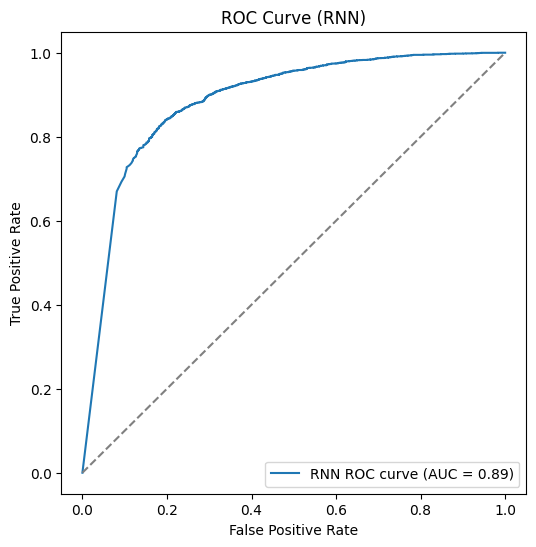

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 1, Loss: 0.3342133069101576
Epoch 2, Loss: 0.20159811060546565
Epoch 3, Loss: 0.13605963802063845
Epoch 4, Loss: 0.07649482017573851
Epoch 5, Loss: 0.03036760296071995
Epoch 6, Loss: 0.009814493034239414
Epoch 7, Loss: 0.0030995324502292652
Epoch 8, Loss: 0.000959326806136001
Epoch 9, Loss: 0.0004560141502086532
Epoch 10, Loss: 0.00023820324120738293
Precision (LSTM): 0.9091
Recall (LSTM): 0.9365
F1 Score (LSTM): 0.9226
AUC (LSTM): 0.8684


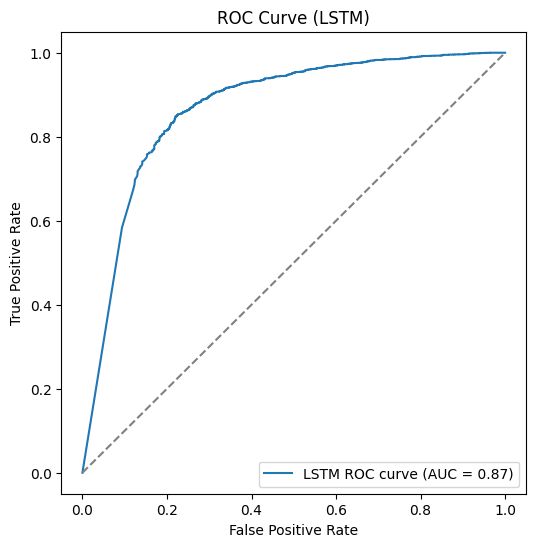

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 1, Loss: 0.32150107027153246
Epoch 2, Loss: 0.19590220181765067
Epoch 3, Loss: 0.12448755180456612
Epoch 4, Loss: 0.05965528433300002
Epoch 5, Loss: 0.01942414195995034
Epoch 6, Loss: 0.005293423036925975
Epoch 7, Loss: 0.0012986757485328915
Epoch 8, Loss: 0.0003782259238807597
Epoch 9, Loss: 0.00017320864677930725
Epoch 10, Loss: 0.00010906297805621354
Precision (GRU): 0.9091
Recall (GRU): 0.9333
F1 Score (GRU): 0.9210
AUC (GRU): 0.8767


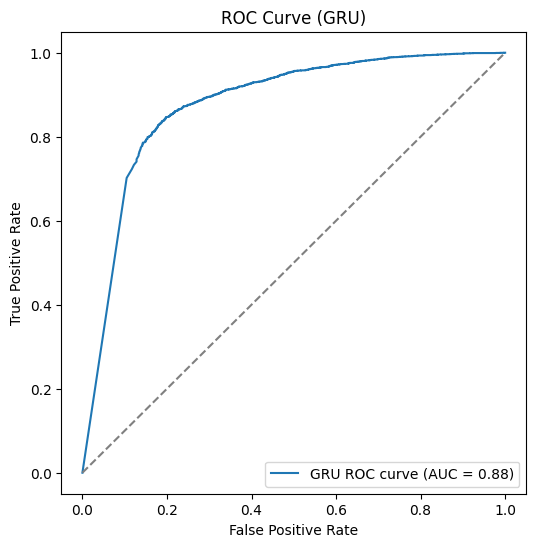

In [18]:
# Function to train and evaluate models
def train_and_evaluate(model, model_name, criterion, optimizer, train_loader, test_loader):
    model.train()
    for epoch in range(10):  # training for 10 epochs
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}')

    # Evaluate the model
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            y_pred_list.append(y_pred.squeeze())
            y_true_list.append(y_batch)

    # Convert predictions and labels to numpy arrays
    y_pred = torch.cat(y_pred_list).numpy()
    y_true = torch.cat(y_true_list).numpy()

    # Convert predictions to binary
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate metrics
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    auc = roc_auc_score(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    print(f"Precision ({model_name}): {precision:.4f}")
    print(f"Recall ({model_name}): {recall:.4f}")
    print(f"F1 Score ({model_name}): {f1:.4f}")
    print(f"AUC ({model_name}): {auc:.4f}")

    # Plot ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({model_name})')
    plt.legend(loc='lower right')
    plt.show()

# Initialize and train models
input_dim = X_train.shape[1]  # Using CountVectorizer features as input_dim

# RNN Model
rnn_model = RNNModel(input_dim)
rnn_criterion = nn.BCELoss()
rnn_optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)
train_and_evaluate(rnn_model, "RNN", rnn_criterion, rnn_optimizer, train_loader, test_loader)

# LSTM Model
lstm_model = LSTMModel(input_dim)
lstm_criterion = nn.BCELoss()
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)
train_and_evaluate(lstm_model, "LSTM", lstm_criterion, lstm_optimizer, train_loader, test_loader)

# GRU Model
gru_model = GRUModel(input_dim)
gru_criterion = nn.BCELoss()
gru_optimizer = optim.Adam(gru_model.parameters(), lr=0.001)
train_and_evaluate(gru_model, "GRU", gru_criterion, gru_optimizer, train_loader, test_loader)